# Optimization: principles and algorithms

Bierlaire, M. (2015). *Optimization: Principles and Algorithms.* EPFL Press.



# Chapter 8: Quasi Newton methods


This notebook replicates the examples from the book, using the python package optimization_book. The numbering of the algorithms, tables and page refer to the book.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import optimization_book.equations as eq

## Algorithm 8.1: Finite difference Newton’s method: one variable


Example 7.3: $F(x)=x^2-2$

In [2]:
def ex0703(x):
    """Example function

    :param x: variable
    :type x: float

    :return: F(x)
    :rtype: float
    """
    return x ** 2 - 2


In [3]:
eps = 1.0e-15

In [4]:
x0 = 2
tau = 1.0e-7
print(f'Run with x0={x0} and tau={tau}')
root, iters, status = eq.newtonFinDiffOneVariable(ex0703, x0, eps, tau)
print(status)
print(f'x= {root} F(x)={ex0703(root)}')


Run with x0=2 and tau=1e-07
Required precision has been reached: 4.440892098500626e-16 <= 1e-15
x= 1.4142135623730951 F(x)=4.440892098500626e-16


Table 8.1, page 204

In [5]:
print('k\txk\t\tF(xk)')
for k in iters:
    print(f'{k[0]}\t{k[1]:+E}\t{k[2]:+E}')

k	xk		F(xk)
0	+2.000000E+00	+2.000000E+00
1	+1.500000E+00	+2.500001E-01
2	+1.416667E+00	+6.944460E-03
3	+1.414216E+00	+6.007682E-06
4	+1.414214E+00	+4.810818E-12
5	+1.414214E+00	+4.440892E-16


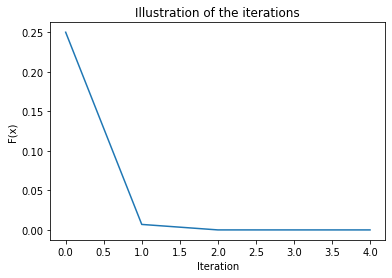

In [6]:
plt.title('Illustration of the iterations')
table = np.array(iters)
plt.xlabel('Iteration')
plt.ylabel('F(x)')
plt.plot(table[1:, 2])
plt.show()

In [7]:
x0 = 2
tau = 0.1
print(f'Run with x0{x0} and tau={tau}')
root, iters, status = eq.newtonFinDiffOneVariable(ex0703, x0, eps, tau)
print(status)
print(f'x= {root} F(x)={ex0703(root)}')


Run with x02 and tau=0.1
Required precision has been reached: 4.440892098500626e-16 <= 1e-15
x= 1.4142135623730951 F(x)=4.440892098500626e-16


Table 8.2, page 205

In [8]:
print('k\txk\t\tF(xk)')
for k in iters:
    print(f'{k[0]}\t{k[1]:+E}\t{k[2]:+E}')

k	xk		F(xk)
0	+2.000000E+00	+2.000000E+00
1	+1.523810E+00	+3.219955E-01
2	+1.423186E+00	+2.545822E-02
3	+1.414668E+00	+1.284856E-03
4	+1.414235E+00	+6.137066E-05
5	+1.414215E+00	+2.922839E-06
6	+1.414214E+00	+1.391838E-07
7	+1.414214E+00	+6.627802E-09
8	+1.414214E+00	+3.156098E-10
9	+1.414214E+00	+1.502842E-11
10	+1.414214E+00	+7.154277E-13
11	+1.414214E+00	+3.419487E-14
12	+1.414214E+00	+1.332268E-15
13	+1.414214E+00	+4.440892E-16


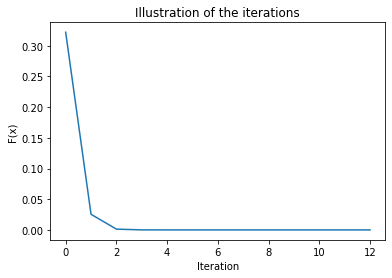

In [9]:
plt.title('Illustration of the iterations')
table = np.array(iters)
plt.xlabel('Iteration')
plt.ylabel('F(x)')
plt.plot(table[1:, 2])
plt.show()

## Algorithm 8.2: Secant method: one variable

In [10]:
x0 = 2
a0 = 1
root, iters, status = eq.secantOneVariable(ex0703, x0, a0, eps)
print(status)
print(f'x= {root} F(x)={ex0703(root)}')


Required precision has been reached: 8.881784197001252e-16 <= 1e-15
x= 1.4142135623730954 F(x)=8.881784197001252e-16


Table 8.3, page 207

In [11]:
print('k\txk\t\tF(xk)\t\tak')
for k in iters:
    print('{0}\t{1:+E}\t{2:+E}\t{3:+E}'.format(*k))

k	xk		F(xk)		ak
0	+2.000000E+00	+2.000000E+00	+1.000000E+00
1	+0.000000E+00	-2.000000E+00	+2.000000E+00
2	+1.000000E+00	-1.000000E+00	+1.000000E+00
3	+2.000000E+00	+2.000000E+00	+3.000000E+00
4	+1.333333E+00	-2.222222E-01	+3.333333E+00
5	+1.400000E+00	-4.000000E-02	+2.733333E+00
6	+1.414634E+00	+1.189768E-03	+2.814634E+00
7	+1.414211E+00	-6.007287E-06	+2.828846E+00
8	+1.414214E+00	-8.931456E-10	+2.828425E+00
9	+1.414214E+00	+8.881784E-16	+2.828427E+00


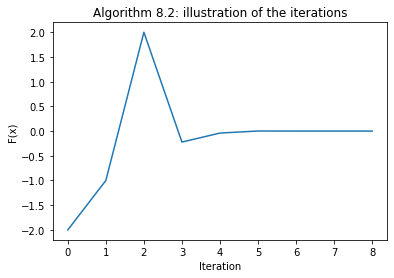

In [12]:
table = np.array(iters)
plt.title('Algorithm 8.2: illustration of the iterations')
plt.xlabel('Iteration')
plt.ylabel('F(x)')
plt.plot(table[1:, 2])
plt.show()


## Algorithm 8.3: finite difference Newton's method: $n$ variables

Example 7.11: $F(x)=\left(\begin{array}{c}(x_1+1)^2+ x_2^2 - 2 \\ e^{x_1} + x_2^3 - 2 \end{array}\right)$

In [13]:
def ex0711(x):
    """Example function

    :param x: variable
    :type x: float

    :return: F(x)
    :rtype: np.array
    """
    f1 = (x[0] + 1) * (x[0] + 1) + x[1] * x[1] - 2
    f2 = np.exp(x[0]) + x[1] * x[1] * x[1] - 2
    f = np.array([f1, f2])
    return f


Run the example with $x_0= \left(\begin{array}{c} 1 \\ 1 \end{array}\right)$ and $\tau=10^{-7}$

In [14]:
eps = 1.0e-15
x0 = np.array([1, 1])
tau = 1.0e-7
root, iters, status = eq.newtonFinDiffNVariables(ex0711, x0, tau, eps)
print(status)

Required precision has been reached: 4.440892098500626e-16 <= 1e-15


Value at the solution

In [15]:
f = ex0711(root)
print(f'x = ({root[0]},{root[1]})\nF(x) = ({f[0]},{f[1]})')

x = (-1.1072444444653868e-16,1.0000000000000002)
F(x) = (0.0,4.440892098500626e-16)


Table 8.4, page 209

In [16]:
print("k\txk\t\tF(xk)\t\t||F(xk)||")
for it in iters:
    print(
        f'{it[0]}\t'
        f'{it[1][0]:+E}\t'
        f'{it[2][0]:+E}\t'
        f'{np.linalg.norm(it[2]):+E}'
    )
    print(f'  \t{it[1][1]:+E}\t' f'{it[2][1]:+E}')

k	xk		F(xk)		||F(xk)||
0	+1.000000E+00	+3.000000E+00	+3.457238E+00
  	+1.000000E+00	+1.718282E+00
1	+1.523592E-01	+7.566298E-01	+1.154709E+00
  	+1.195282E+00	+8.722750E-01
2	-1.083769E-02	+5.196848E-02	+1.140426E-01
  	+1.036111E+00	+1.015135E-01
3	-8.896678E-04	+1.294458E-03	+3.942346E-03
  	+1.001535E+00	+3.723771E-03
4	-1.370169E-06	+3.137520E-06	+8.080614E-06
  	+1.000003E+00	+7.446629E-06
5	-5.688116E-12	+1.094103E-11	+2.986392E-11
  	+1.000000E+00	+2.778755E-11
6	-1.107244E-16	+0.000000E+00	+4.440892E-16
  	+1.000000E+00	+4.440892E-16


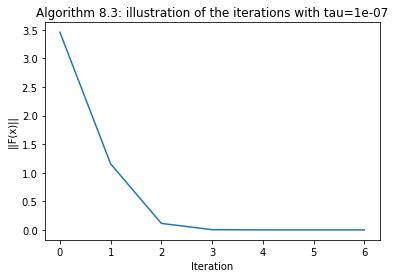

In [17]:
norm = [np.linalg.norm(iters[k][2]) for k in range(len(iters))]
plt.title(f'Algorithm 8.3: illustration of the iterations with {tau=}')
plt.xlabel('Iteration')
plt.ylabel('||F(x)||')
plt.plot(norm)
plt.show()


Run the example with $x_0= \left(\begin{array}{c} 1 \\ 1 \end{array}\right)$ and $\tau=0.1$

In [18]:
tau = 0.1
root, iters, status = eq.newtonFinDiffNVariables(ex0711, x0, tau, eps)
print(status)


Required precision has been reached: 2.220446049250313e-16 <= 1e-15


Value at the solution

In [19]:
f = ex0711(root)
print(f'x = ({root[0]},{root[1]})\nF(x) = ({f[0]},{f[1]})')

x = (-6.963303502971255e-17,1.0)
F(x) = (-2.220446049250313e-16,0.0)


Table 8.5, page 210

In [20]:
print("k\txk\t\tF(xk)\t\t||F(xk)||")
for it in iters:
    print(
        f'{it[0]}\t'
        f'{it[1][0]:+E}\t'
        f'{it[2][0]:+E}\t'
        f'{np.linalg.norm(it[2]):+E}'
    )
    print(f'  \t{it[1][1]:+E}\t' f'{it[2][1]:+E}')

k	xk		F(xk)		||F(xk)||
0	+1.000000E+00	+3.000000E+00	+3.457238E+00
  	+1.000000E+00	+1.718282E+00
1	+1.646297E-01	+8.021033E-01	+1.218528E+00
  	+1.202390E+00	+9.173006E-01
2	-1.457411E-02	+8.859858E-02	+1.889729E-01
  	+1.057135E+00	+1.669163E-01
3	-5.723563E-03	+8.214593E-03	+2.525362E-02
  	+1.009767E+00	+2.388024E-02
4	-4.768964E-04	+1.488248E-03	+3.518427E-03
  	+1.001220E+00	+3.188173E-03
5	-6.650782E-05	+1.503511E-04	+3.888142E-04
  	+1.000142E+00	+3.585680E-04
6	-7.022846E-06	+1.850894E-05	+4.572319E-05
  	+1.000016E+00	+4.180944E-05
7	-8.386496E-07	+2.059562E-06	+5.192563E-06
  	+1.000002E+00	+4.766646E-06
8	-9.451126E-08	+2.398182E-07	+5.988650E-07
  	+1.000000E+00	+5.487499E-07
9	-1.093846E-08	+2.733859E-08	+6.857038E-08
  	+1.000000E+00	+6.288481E-08
10	-1.250422E-09	+3.147179E-09	+7.877591E-09
  	+1.000000E+00	+7.221614E-09
11	-1.437612E-10	+3.606582E-10	+9.036054E-10
  	+1.000000E+00	+8.285097E-10
12	-1.648447E-11	+4.141754E-11	+1.037231E-10
  	+1.000000E+00	+9.509504E-11

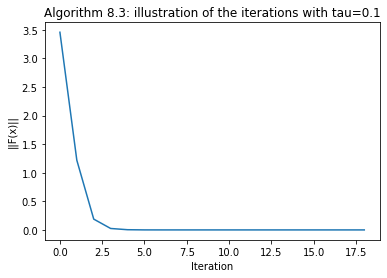

In [21]:
norm = [np.linalg.norm(iters[k][2]) for k in range(len(iters))]
plt.title(f'Algorithm 8.3: illustration of the iterations with {tau=}')
plt.xlabel('Iteration')
plt.ylabel('||F(x)||')
plt.plot(norm)
plt.show()


## Algorithm 8.4: secant method: $n$ variables

Example 7.11: $F(x)=\left(\begin{array}{c}(x_1+1)^2+ x_2^2 - 2 \\ e^{x_1} + x_2^3 - 2 \end{array}\right)$, $x_0=\left(\begin{array}{c} 1 \\ 1 \end{array}\right)$



In [22]:
x0 = np.array([1, 1])
root, iters, status = eq.secantNVariables(ex0711, x0, 1.0e-15)
print(status)
print('Value at the solution')
f = ex0711(root)
print(f'x= ({root[0]}, {root[1]}) F(x)=({f[0]}, {f[1]})')


Required precision has been reached: 2.220446049250313e-16 <= 1e-15
Value at the solution
x= (-1.7137474114864424, 1.220886822189675) F(x)=(-2.220446049250313e-16, 0.0)


Table 8.6, page 215

In [23]:
print('k\txk\t\tF(xk)\t\t||F(xk)||')
for it in iters:
    print(
        f'{it[0]}\t'
        f'{it[1][0]:+E}\t'
        f'{it[2][0]:+E}\t'
        f'{np.linalg.norm(it[2]):+E}'
    )
    print(f'  \t' f'{it[1][1]:+E}' f'\t{it[2][1]:+E}')

k	xk		F(xk)		||F(xk)||
0	+1.000000E+00	+3.000000E+00	+3.457238E+00
  	+1.000000E+00	+1.718282E+00
1	-2.000000E+00	-4.840712E-01	+2.287062E+00
  	-7.182818E-01	-2.235247E+00
2	-1.664500E+00	-8.680087E-01	+1.511178E+00
  	+8.309216E-01	-1.237021E+00
3	-2.425626E-01	+2.725982E+00	+7.741565E+00
  	+2.037712E+00	+7.245747E+00
4	-1.241556E+00	-1.346760E+00	+1.838980E+00
  	+7.712913E-01	-1.252232E+00
5	-5.805217E-01	-1.645775E+00	+2.138259E+00
  	+4.222118E-01	-1.365129E+00
6	-3.261932E+00	+7.270839E+00	+9.756876E+00
  	+2.038260E+00	+6.506268E+00
7	-1.109053E+00	-1.487538E+00	+1.986088E+00
  	+7.075096E-01	-1.315971E+00
8	-1.479062E+00	-9.030118E-01	+1.321012E+00
  	+9.313901E-01	-9.641795E-01
9	-1.832870E+00	+3.276810E-01	+4.113589E-01
  	+1.278283E+00	+2.486791E-01
10	-1.707157E+00	-8.164065E-02	+1.531300E-01
  	+1.190919E+00	-1.295515E-01
11	-1.709528E+00	-2.136459E-02	+3.466046E-02
  	+1.214580E+00	-2.729289E-02
12	-1.714002E+00	+2.444559E-03	+4.491289E-03
  	+1.221739E+00	+3.767733E-03

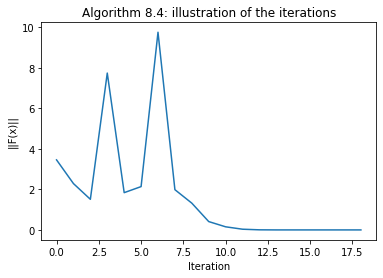

In [24]:
plt.title('Algorithm 8.4: illustration of the iterations')
norm = [np.linalg.norm(it[2]) for it in iters]
plt.xlabel('Iteration')
plt.ylabel('||F(x)||')
plt.plot(norm)
plt.show()

Table 8.7, page 215

In [25]:
def ex0711_with_J(x):
    """Example function

    :param x: variable
    :type x: float

    :return: F(x) and J(x)
    :rtype: np.array, np.array
    """
    f1 = (x[0] + 1) * (x[0] + 1) + x[1] * x[1] - 2
    f2 = np.exp(x[0]) + x[1] * x[1] * x[1] - 2
    f = np.array([f1, f2])
    J11 = 2 * (x[0] + 1)
    J12 = 2 * x[1]
    J21 = np.exp(x[0])
    J22 = 3 * x[1] * x[1]
    J = np.array([[J11, J12], [J21, J22]])
    return f, J


In [26]:
for k, it in enumerate(iters):
    x = it[1]
    A = it[3]
    J = ex0711_with_J(x)[1]
    print(
        f'{k}\t'
        f'{J[0,0]:+E}\t'
        f'{J[0,1]:+E}\t'
        f'{A[0,0]:+E}\t'
        f'{A[0,1]:+E}'
    )

    print(
        f'  \t'
        f'{J[1,0]:+E}\t'
        f'{J[1,1]:+E}\t'
        f'{A[1,0]:+E}\t'
        f'{A[1,1]:+E}'
    )

0	+4.000000E+00	+2.000000E+00	+1.000000E+00	+0.000000E+00
  	+2.718282E+00	+3.000000E+00	+0.000000E+00	+1.000000E+00
1	-2.000000E+00	-1.436564E+00	+1.121499E+00	+6.958973E-02
  	+1.353353E-01	+1.547786E+00	+5.610329E-01	+1.321338E+00
2	-1.329001E+00	+1.661843E+00	+1.005596E+00	-4.656036E-01
  	+1.892852E-01	+2.071292E+00	+3.958567E-01	+5.586201E-01
3	+1.514875E+00	+4.075424E+00	+2.120000E+00	+4.801851E-01
  	+7.846147E-01	+1.245681E+01	+3.357979E+00	+3.072556E+00
4	-4.831116E-01	+1.542583E+00	+2.637104E+00	+1.135716E+00
  	+2.889343E-01	+1.784671E+00	+3.838787E+00	+3.682075E+00
5	+8.389567E-01	+8.444236E-01	+6.903080E-01	+2.163781E+00
  	+5.596064E-01	+5.347884E-01	+2.223969E+00	+4.534830E+00
6	-4.523864E+00	+4.076519E+00	-1.298771E+00	+3.362571E+00
  	+3.831430E-02	+1.246351E+01	+4.440528E-01	+5.607560E+00
7	-2.181055E-01	+1.415019E+00	-1.798708E+00	+3.671595E+00
  	+3.298713E-01	+1.501710E+00	+1.776645E-03	+5.880942E+00
8	-9.581246E-01	+1.862780E+00	-1.223640E-02	+2.590660E+00
  	+2.